In [2]:
from macros import *
from true_params import *
from learn_mixture import *

def array_printer(arr):
    for line in arr:
        print(str(line).replace("\n", ""))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
np.set_printoptions(formatter={"float": lambda x: "{0:+0.3f}".format(x)})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Run Normal Algorithm

In [5]:
s = max(lds.s for lds in LDS_LIST)
kappa = max(*[lds.kappa for lds in LDS_LIST],
            *[op_norm(lds.get_observability(2*s))/min_sv(lds.get_controllability(s)) for lds in LDS_LIST])

print(f"s={s}, kappa={kappa}")

s=2, kappa=1.414213562373095


In [6]:
expected_weights = [0.5, 0.5]
samples = generate_samples(LDS_LIST, expected_weights, s, 10000)

Pi_M = get_Pi_M(samples, s)
G_tilde = get_G_tilde(p, n, s, k, Pi_M)
R = get_R(samples)
approx_weights, markov_parameters = adjust_for_weights(G_tilde, R, s)

check: True
frobenius norm of Pi_M: 6.902916216937852
frobenius norm after approx: 1.3253384911477208


c:\Users\nitin\Desktop\School\MEng\learn_mixture.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sqrt_weights, _, _, _ = la.lstsq(G_tilde.reshape((G_tilde.shape[0], -1)).T, R[:2*s+1].flatten())


### Checking Pi_M

In [7]:
expected_Pi_M = get_expected_Pi_M(LDS_LIST, expected_weights, s)

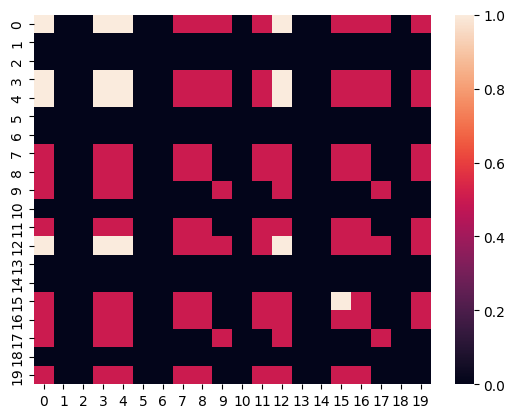

<Axes: >

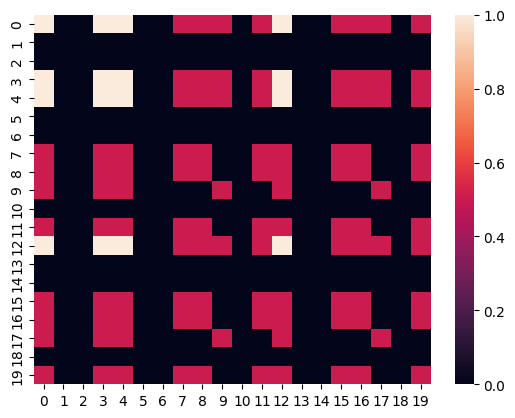

In [9]:
sns.heatmap(np.round(Pi_M*2)/2, vmin=0, vmax=1)
plt.show()
sns.heatmap(expected_Pi_M, vmin=0, vmax=1)

In [10]:
array_printer(expected_Pi_M)

[+1.0 +0.0 +0.0 +1.0 +1.0 +0.0 +0.0 +0.5 +0.5 +0.5 +0.0 +0.5 +1.0 +0.0 +0.0 +0.5 +0.5 +0.5 +0.0 +0.5]
[+0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0]
[+0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0]
[+1.0 +0.0 +0.0 +1.0 +1.0 +0.0 +0.0 +0.5 +0.5 +0.5 +0.0 +0.5 +1.0 +0.0 +0.0 +0.5 +0.5 +0.5 +0.0 +0.5]
[+1.0 +0.0 +0.0 +1.0 +1.0 +0.0 +0.0 +0.5 +0.5 +0.5 +0.0 +0.5 +1.0 +0.0 +0.0 +0.5 +0.5 +0.5 +0.0 +0.5]
[+0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0]
[+0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0 +0.0]
[+0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5]
[+0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.5]
[+0.5 +0.0 +0.0 +0.5 +0.5 +0.0 +0.0 +0.0 +0.0 +0.5 +0.0 +0.0 +0.5 +0.0 +0.0 +0.0 +

In [41]:
array_printer(Pi_M - expected_Pi_M)

[-0.044 +0.011 -0.014 +0.032 -0.045 +0.013 +0.070 +0.040 -0.027 -0.089 -0.041 +0.096 -0.103 -0.032 -0.062 -0.014 +0.018 -0.011 +0.044 +0.086]
[+0.011 +0.054 +0.013 +0.000 -0.001 +0.116 -0.047 -0.028 -0.067 +0.048 -0.005 +0.012 -0.039 +0.028 -0.003 -0.065 -0.091 -0.049 -0.055 -0.031]
[-0.014 +0.013 +0.007 +0.028 -0.053 +0.056 -0.005 +0.027 -0.047 +0.071 +0.024 -0.074 -0.086 +0.028 -0.008 -0.141 +0.008 +0.090 +0.001 -0.119]
[+0.032 +0.000 +0.028 +0.053 +0.065 +0.072 +0.053 +0.079 +0.014 -0.106 +0.047 +0.173 +0.118 +0.094 +0.076 +0.214 -0.063 -0.059 -0.005 -0.073]
[-0.045 -0.001 -0.053 +0.065 -0.049 +0.034 +0.012 -0.013 -0.104 -0.003 -0.043 +0.049 -0.140 -0.089 -0.065 -0.041 +0.033 +0.030 -0.001 +0.105]
[+0.013 +0.116 +0.056 +0.072 +0.034 +0.197 +0.005 -0.033 -0.027 -0.025 -0.037 -0.018 +0.008 +0.035 +0.008 -0.015 -0.087 -0.095 -0.020 +0.053]
[+0.070 -0.047 -0.005 +0.053 +0.012 +0.005 +0.002 +0.090 +0.027 +0.036 +0.012 -0.007 +0.027 -0.079 -0.070 -0.087 +0.161 -0.018 -0.085 -0.015]
[+0.04

In [42]:
la.norm(Pi_M)**2, la.norm(expected_Pi_M)**2, np.sqrt(np.sum((Pi_M - expected_Pi_M)**2)/400)

(47.650252298063585, 42.0, 0.08236592490561022)

In [43]:
mean, vars = get_Pi_M_with_var(samples, s)
stdevs = np.sqrt(vars)
array_printer(stdevs)

[+8.136 +4.600 +6.741 +5.078 +10.637 +5.583 +9.297 +7.140 +13.035 +7.510 +11.470 +7.455 +17.084 +9.094 +16.416 +10.337 +18.499 +9.598 +19.312 +10.985]
[+4.712 +3.890 +3.958 +4.292 +6.284 +6.050 +5.555 +6.853 +8.920 +9.338 +7.425 +9.606 +9.675 +12.206 +9.026 +13.521 +10.864 +13.386 +10.226 +14.387]
[+5.712 +4.125 +4.590 +4.610 +8.455 +5.331 +7.489 +6.603 +11.129 +7.274 +10.498 +8.022 +14.857 +9.255 +14.565 +12.137 +16.933 +10.009 +17.138 +11.650]
[+5.400 +5.423 +4.497 +6.764 +6.439 +7.861 +5.859 +11.603 +8.248 +12.918 +7.338 +12.032 +10.168 +14.958 +10.068 +18.019 +11.083 +17.113 +10.852 +18.928]
[+7.734 +4.969 +7.276 +5.471 +13.140 +6.298 +13.102 +6.872 +13.878 +8.042 +12.580 +7.467 +20.901 +10.207 +21.640 +10.270 +20.368 +10.354 +21.937 +10.858]
[+5.202 +4.334 +4.435 +4.494 +7.472 +6.466 +6.608 +6.826 +9.221 +10.051 +7.625 +10.070 +10.568 +13.464 +10.813 +15.059 +11.069 +14.245 +10.758 +14.559]
[+6.080 +4.428 +5.679 +4.594 +8.884 +6.037 +8.179 +6.426 +13.667 +7.751 +13.555 +7.691 +16.

### Check R

In [44]:
np.unique(np.round(R*2)/2, return_counts=True)

(array([+0.000, +0.500, +1.000]), array([16, 17,  7], dtype=int64))

In [45]:
expected_R = get_expected_R(LDS_LIST, expected_weights, s)
np.unique(expected_R, return_counts=True)

(array([+0.000, +0.500, +1.000]), array([16, 17,  7], dtype=int64))

In [46]:
array_printer(expected_R)

[[+1.000 +0.000] [+0.000 +1.000]]
[[+1.000 +0.000] [+0.000 +0.500]]
[[+0.500 +0.500] [+0.000 +0.500]]
[[+1.000 +0.000] [+0.000 +0.500]]
[[+0.500 +0.500] [+0.000 +0.500]]
[[+1.000 +0.000] [+0.000 +0.500]]
[[+0.500 +0.500] [+0.000 +0.500]]
[[+1.000 +0.000] [+0.000 +0.500]]
[[+0.500 +0.500] [+0.000 +0.500]]
[[+1.000 +0.000] [+0.000 +0.500]]


In [47]:
array_printer(R)

[[+1.033 +0.010] [+0.001 +1.020]]
[[+1.006 +0.000] [-0.000 +0.514]]
[[+0.512 +0.498] [+0.029 +0.545]]
[[+0.990 +0.001] [+0.003 +0.529]]
[[+0.467 +0.474] [-0.027 +0.530]]
[[+0.965 -0.010] [+0.023 +0.511]]
[[+0.409 +0.489] [+0.002 +0.535]]
[[+0.920 -0.048] [-0.006 +0.543]]
[[+0.410 +0.454] [-0.003 +0.555]]
[[+0.962 +0.018] [+0.015 +0.579]]


### Checking G tilde

In [79]:
flattened_markov_params = [np.concatenate((lds.D.flatten(),) + tuple((lds.C @ mpow(lds.A, i) @ lds.B).flatten() for i in range(2*s))) for lds in LDS_LIST]
indiv_Pi_M = [np.outer(vec, vec) for vec in flattened_markov_params]
np.array_equal(expected_Pi_M, (indiv_Pi_M[0] + indiv_Pi_M[1])/2)

True

In [80]:
U, S, Vh = np.linalg.svd(expected_Pi_M)

In [81]:
np.allclose(U @ np.diag(S) @ Vh, expected_Pi_M), np.allclose(U[:, :2], (Vh[:2, :]).T)

(True, True)

In [84]:
la.norm(flattened_markov_params[0]/3.16)

1.000720778534297

In [ ]:
U[:, :1] @ np.diag(S[:1]) @ Vh[:1, :]

In [48]:
expected_G_tilde = get_G_tilde(p, n, s, k, expected_Pi_M)

check: True
frobenius norm of Pi_M: 6.48074069840786
frobenius norm after approx: 1.4176947142090917e-15


In [49]:
expected_G_tilde

array([[[[-0.973, -0.000],
         [+0.000, -0.973]],

        [[-0.973, +0.000],
         [+0.000, -0.602]],

        [[-0.602, -0.372],
         [+0.000, -0.602]],

        [[-0.973, +0.000],
         [+0.000, -0.602]],

        [[-0.602, -0.372],
         [+0.000, -0.602]]],


       [[[+0.230, +0.000],
         [+0.000, +0.230]],

        [[+0.230, +0.000],
         [+0.000, -0.372]],

        [[-0.372, +0.602],
         [+0.000, -0.372]],

        [[+0.230, +0.000],
         [+0.000, -0.372]],

        [[-0.372, +0.602],
         [+0.000, -0.372]]]])

In [23]:
G_tilde = get_G_tilde(p, n, s, k, Pi_M)

check: True
frobenius norm of Pi_M: 6.902916216937852
frobenius norm after approx: 1.3253384911477208


In [27]:
np.abs(G_tilde) - np.abs(expected_G_tilde)

array([[[[-0.0, +0.0],
         [+0.0, +0.0]],

        [[-0.0, +0.0],
         [+0.0, +0.1]],

        [[-0.0, -0.1],
         [+0.0, +0.1]],

        [[-0.0, +0.0],
         [+0.0, +0.1]],

        [[+0.0, -0.1],
         [+0.0, -0.0]]],


       [[[+0.0, +0.0],
         [+0.1, +0.0]],

        [[+0.1, +0.0],
         [+0.0, -0.0]],

        [[+0.0, +0.1],
         [+0.0, -0.0]],

        [[+0.1, +0.1],
         [+0.0, +0.1]],

        [[+0.0, +0.0],
         [+0.1, -0.1]]]])

### Adjust for Weights

In [37]:
G_hat, approx_weights = adjust_for_weights(G_tilde, R, s)
print(approx_weights)
G_hat

[+0.9 +0.1]


c:\Users\nitin\Desktop\School\MEng\learn_mixture.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sqrt_weights, _, _, _ = la.lstsq(G_tilde.reshape((G_tilde.shape[0], -1)).T, R[:2*s+1].flatten())


[array([[[+1.0, -0.0],
         [-0.0, +1.1]],
 
        [[+1.0, -0.0],
         [+0.0, +0.7]],
 
        [[+0.6, +0.3],
         [-0.0, +0.8]],
 
        [[+1.0, +0.0],
         [-0.0, +0.7]],
 
        [[+0.6, +0.3],
         [-0.0, +0.6]]]),
 array([[[+0.8, +0.2],
         [+0.3, +0.8]],
 
        [[+1.0, +0.0],
         [-0.0, -1.2]],
 
        [[-1.4, +2.4],
         [+0.1, -1.1]],
 
        [[+1.1, -0.5],
         [+0.0, -1.5]],
 
        [[-1.3, +2.1],
         [+0.3, -0.8]]])]

In [38]:
expected_G_hat, expected_approx_weights = adjust_for_weights(expected_G_tilde, expected_R, s)
print(expected_approx_weights)
G_hat

[+0.9 +0.1]


c:\Users\nitin\Desktop\School\MEng\learn_mixture.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sqrt_weights, _, _, _ = la.lstsq(G_tilde.reshape((G_tilde.shape[0], -1)).T, R[:2*s+1].flatten())


[array([[[+1.0, -0.0],
         [-0.0, +1.1]],
 
        [[+1.0, -0.0],
         [+0.0, +0.7]],
 
        [[+0.6, +0.3],
         [-0.0, +0.8]],
 
        [[+1.0, +0.0],
         [-0.0, +0.7]],
 
        [[+0.6, +0.3],
         [-0.0, +0.6]]]),
 array([[[+0.8, +0.2],
         [+0.3, +0.8]],
 
        [[+1.0, +0.0],
         [-0.0, -1.2]],
 
        [[-1.4, +2.4],
         [+0.1, -1.1]],
 
        [[+1.1, -0.5],
         [+0.0, -1.5]],
 
        [[-1.3, +2.1],
         [+0.3, -0.8]]])]

In [33]:
G_hat - expected_G_hat

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [39]:
G_tilde.reshape((G_tilde.shape[0], -1)).T

array([[+0.9, -0.2],
       [-0.0, -0.0],
       [-0.0, -0.1],
       [+1.0, -0.2],
       [+0.9, -0.3],
       [-0.0, -0.0],
       [+0.0, +0.0],
       [+0.7, +0.4],
       [+0.6, +0.4],
       [+0.3, -0.7],
       [-0.0, -0.0],
       [+0.7, +0.3],
       [+1.0, -0.3],
       [+0.0, +0.1],
       [-0.0, -0.0],
       [+0.7, +0.5],
       [+0.6, +0.4],
       [+0.3, -0.6],
       [-0.0, -0.1],
       [+0.6, +0.2]])